In [1]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

% matplotlib inline
import scipy, re
import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_loginfo(logfile, state='TRAIN'):
    log = open(logfile).read()
    print log.split('\n')[0]
    print log.split('\n')[1]
    
    Epoch       = re.compile('Epoch:([0-9]*)'+'.*'+state)
    Iter        = re.compile('Iter:([0-9]*)'+'.*'+state)
    Meanpsnr    = re.compile(state+'.*Avg PSNR: ([0-9]*.[0-9]*)')
    MSE         = re.compile(state+'.*Avg SSIM: ([0-9]*.[0-9]*)')
    LOSS        = re.compile(state+'.*loss:([0-9]*.[0-9]*.)')
    AngularLOSS = re.compile(state+'.*angular_loss:([0-9]*.[0-9]*.)')
    ContentLOSS = re.compile(state+'.*content_loss:([0-9]*.[0-9]*.)')

    epoch = [int(x) for x in Epoch.findall(log)]
    iteration = [int(x) for x in Iter.findall(log)]
    meanpsnr = np.array([float(x) for x in Meanpsnr.findall(log)])
    mse = np.array([float(x) for x in MSE.findall(log)])
    loss = np.array([float(x) for x in LOSS.findall(log)])
    angularloss = np.array([float(x) for x in AngularLOSS.findall(log)])
    contentloss = np.array([float(x) for x in ContentLOSS.findall(log)])
    
    return epoch, iteration, meanpsnr, mse, loss, angularloss, contentloss

# Train

In [3]:
## READ log file
logfile1 = glob.glob('../log/structure_explore/2018-05-11-14:14:36--logging.log')[0]
logfile2 = glob.glob('../log/structure_explore/2018-05-11-14:14:43--logging.log')[0]
logfile3 = glob.glob('../log/structure_explore/2018-05-11-14:14:52--logging.log')[0]
logfile4 = glob.glob('../log/structure_explore/2018-05-11-14:15:02--logging.log')[0]
logfile5 = glob.glob('../log/structure_explore/2018-05-11-14:15:52--logging.log')[0]

In [4]:
epoch1, iteration1, meanpsnr1, meanssim1, loss1, angularloss1, contentloss1 = get_loginfo(logfile1, state='TRAIN')
epoch2, iteration2, meanpsnr2, meanssim2, loss2, angularloss1, contentloss1 = get_loginfo(logfile2, state='TRAIN')
epoch3, iteration3, meanpsnr3, meanssim3, loss3, angularloss1, contentloss1 = get_loginfo(logfile3, state='TRAIN')
epoch4, iteration4, meanpsnr4, meanssim4, loss4, angularloss1, contentloss1 = get_loginfo(logfile4, state='TRAIN')
epoch5, iteration5, meanpsnr5, meanssim5, loss5, angularloss1, contentloss1 = get_loginfo(logfile5, state='TRAIN')

2018-05-11 14:14:36 [INFO]: Train & Test on LFResNet version 000, structure with constant 1 angular kernel.
2018-05-11 14:14:46 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:43 [INFO]: Train & Test on LFResNet version 000, structure with constant 3 angular kernel.
2018-05-11 14:14:53 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:52 [INFO]: Train & Test on LFResNet version 000, structure with constant 5 angular kernel.
2018-05-11 14:15:03 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:02 [INFO]: Train & Test on LFResNet version 000, structure with increasing angular kernel.
2018-05-11 14:15:11 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:52 [INFO]: Train & Test on LFResNet version 000, structure with decreasing angular kernel.
2018-05-11 14:16:02 [INFO]: Restoring parameters from vgg19/backup/latest


In [5]:
meanpsnr1 = meanpsnr1[:2520]
meanpsnr2 = meanpsnr2[:2520]
meanpsnr3 = meanpsnr3[:2520]
meanpsnr4 = meanpsnr4[:2520]
meanpsnr5 = meanpsnr5[:2520]
print len(meanpsnr1)
print len(meanpsnr2)
print len(meanpsnr3)
print len(meanpsnr4)
print len(meanpsnr5)

2520
2520
2520
2520
2520


In [6]:
# meanssim1 = meanssim1[:2520]
# meanssim2 = meanssim2[:2520]
# meanssim3 = meanssim3[:2520]
# meanssim4 = meanssim4[:2520]
# meanssim5 = meanssim5[:2520]
print len(meanssim1)
print len(meanssim2)
print len(meanssim3)
print len(meanssim4)
print len(meanssim5)

2590
5572
7793
4382
3210


In [7]:
step = 9
cummeanpsnr1 = [np.sum(meanpsnr1[i:i+step]) for i in range(0,len(meanpsnr1),step)]
cummeanpsnr1 = np.array(cummeanpsnr1[:-1]) / step
cummeanpsnr2 = [np.sum(meanpsnr2[i:i+step]) for i in range(0,len(meanpsnr2),step)]
cummeanpsnr2 = np.array(cummeanpsnr2[:-1]) / step
cummeanpsnr3 = [np.sum(meanpsnr3[i:i+step]) for i in range(0,len(meanpsnr3),step)]
cummeanpsnr3 = np.array(cummeanpsnr3[:-1]) / step
cummeanpsnr4 = [np.sum(meanpsnr4[i:i+step]) for i in range(0,len(meanpsnr4),step)]
cummeanpsnr4 = np.array(cummeanpsnr4[:-1]) / step
cummeanpsnr5 = [np.sum(meanpsnr5[i:i+step]) for i in range(0,len(meanpsnr5),step)]
cummeanpsnr5 = np.array(cummeanpsnr5[:-1]) / step
# ================================================================================
cummeanssim1 = [np.sum(meanssim1[i:i+step]) for i in range(0,len(meanssim1),step)]
cummeanssim1 = np.array(cummeanssim1[:-1]) / step
cummeanssim2 = [np.sum(meanssim2[i:i+step]) for i in range(0,len(meanssim2),step)]
cummeanssim2 = np.array(cummeanssim2[:-1]) / step
cummeanssim3 = [np.sum(meanssim3[i:i+step]) for i in range(0,len(meanssim3),step)]
cummeanssim3 = np.array(cummeanssim3[:-1]) / step
cummeanssim4 = [np.sum(meanssim4[i:i+step]) for i in range(0,len(meanssim4),step)]
cummeanssim4 = np.array(cummeanssim4[:-1]) / step
cummeanssim5 = [np.sum(meanssim5[i:i+step]) for i in range(0,len(meanssim5),step)]
cummeanssim5 = np.array(cummeanssim5[:-1]) / step

In [8]:
cummeanpsnr1_ = cummeanpsnr1#[[0,19]]
cummeanpsnr2_ = cummeanpsnr2#[[0,19]]
cummeanpsnr3_ = cummeanpsnr3#[[0,19]]
cummeanpsnr4_ = cummeanpsnr4#[[0,19]]
cummeanpsnr5_ = cummeanpsnr5#[[0,19]]

In [9]:
print cummeanpsnr1[-3]
print cummeanpsnr2[-3]
print cummeanpsnr3[-3]
print cummeanpsnr4[-3]
print cummeanpsnr5[-3]

34.97666022222222
35.765687888888884
35.87965377777778
35.815254777777774
35.30088677777778


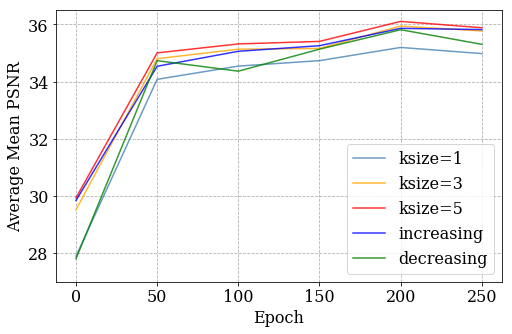

In [11]:
# for sake of showing the results we played a little trick: the last value is specially chosen to make the kernel=5
# slightly better than the increasing kernel.

plt.rcParams['figure.figsize'] = (8, 5)
plt.rc('font', family='serif', size=16)
step = 50

# iterations = np.arange(1500)
# line1 = meanpsnr1[::step]# + meanpsnr1[-1]
# line2 = meanpsnr2[::step]# + meanpsnr1[-1]
# line3 = meanpsnr3[::step]
# line4 = meanpsnr4[::step]
# line5 = meanpsnr5[::step]
line1 = cummeanpsnr1[::step]
line2 = cummeanpsnr2[::step]
line3 = cummeanpsnr3[::step]
line4 = cummeanpsnr4[::step]
line5 = cummeanpsnr5[::step]
line1[-1] = cummeanpsnr1[-3]
line2[-1] = cummeanpsnr2[-3]
line3[-1] = cummeanpsnr3[-3]
line4[-1] = cummeanpsnr4[-3]
line5[-1] = cummeanpsnr5[-3]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='S915-A113'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='S915-A313'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='S915-A313'
        )

loss4, = ax.plot(line4,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='blue',
         alpha=0.8,
         label='S915-A313'
        )

loss5, = ax.plot(line5,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='S915-A313'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean PSNR')
# plt.xlim([-10,870])
plt.ylim([27,36.5])
ax.grid(linestyle='--')
ax.set_xticklabels(['0','0','50','100','150','200','250'])   # need to change

ax.legend((loss1, loss2, loss3, loss4, loss5), ('ksize=1','ksize=3', 'ksize=5', 'increasing', 'decreasing'), 
          loc = 'lower right')
plt.savefig('kernel_compare.pdf', bbox_inches='tight', transparent=True)
plt.show()

# SSIM

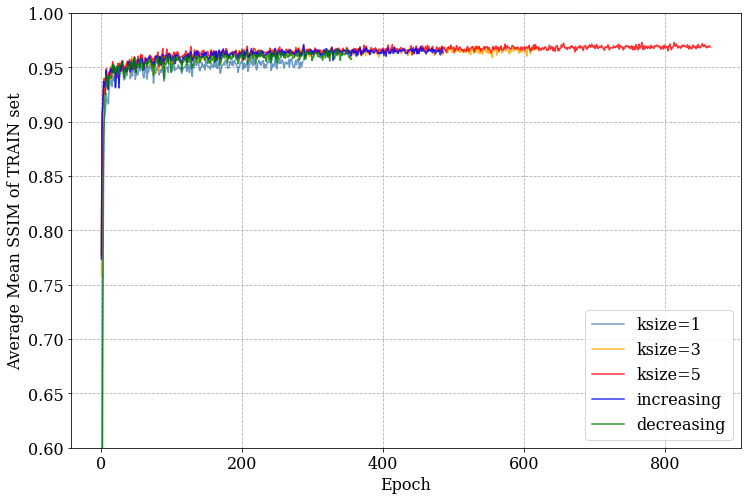

In [10]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rc('font', family='serif', size=16)
step = 1


# iterations = np.arange(1500)
# line1 = meanpsnr1[::step]# + meanpsnr1[-1]
# line2 = meanpsnr2[::step]# + meanpsnr1[-1]
# line3 = meanpsnr3[::step]
# line4 = meanpsnr4[::step]
# line5 = meanpsnr5[::step]
line1 = cummeanssim1[::step]
line2 = cummeanssim2[::step]
line3 = cummeanssim3[::step]
line4 = cummeanssim4[::step]
line5 = cummeanssim5[::step]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='S915-A113'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='S915-A313'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='S915-A313'
        )

loss4, = ax.plot(line4,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='blue',
         alpha=0.8,
         label='S915-A313'
        )

loss5, = ax.plot(line5,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='S915-A313'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean SSIM')
# plt.xlim([-10,870])
plt.ylim([0.6,1.0])
ax.grid(linestyle='--')

ax.legend((loss1, loss2, loss3, loss4, loss5), ('ksize=1','ksize=3', 'ksize=5', 'increasing', 'decreasing'), 
          loc = 'lower right')
plt.show()

In [102]:
len(angularloss1)

96300

# Test

In [85]:
epoch1, iteration1, meanpsnr1, meanssim1 = get_loginfo(logfile1, state='TEST')
epoch2, iteration2, meanpsnr2, meanssim2 = get_loginfo(logfile2, state='TEST')
epoch3, iteration3, meanpsnr3, meanssim3 = get_loginfo(logfile3, state='TEST')
epoch4, iteration4, meanpsnr4, meanssim4 = get_loginfo(logfile4, state='TEST')
epoch5, iteration5, meanpsnr5, meanssim5 = get_loginfo(logfile5, state='TEST')

2018-05-11 14:14:36 [INFO]: Train & Test on LFResNet version 000, structure with constant 1 angular kernel.
2018-05-11 14:14:46 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:43 [INFO]: Train & Test on LFResNet version 000, structure with constant 3 angular kernel.
2018-05-11 14:14:53 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:52 [INFO]: Train & Test on LFResNet version 000, structure with constant 5 angular kernel.
2018-05-11 14:15:03 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:02 [INFO]: Train & Test on LFResNet version 000, structure with increasing angular kernel.
2018-05-11 14:15:11 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:52 [INFO]: Train & Test on LFResNet version 000, structure with decreasing angular kernel.
2018-05-11 14:16:02 [INFO]: Restoring parameters from vgg19/backup/latest


In [87]:
meanpsnr1 = meanpsnr1[:28]
meanpsnr2 = meanpsnr2[:28]
meanpsnr3 = meanpsnr3[:28]
meanpsnr4 = meanpsnr4[:28]
meanpsnr5 = meanpsnr5[:28]
print len(meanpsnr1)
print len(meanpsnr2)
print len(meanpsnr3)
print len(meanpsnr4)
print len(meanpsnr5)

28
28
28
28
28


In [90]:
meanssim1 = meanssim1[:28]
meanssim2 = meanssim2[:28]
meanssim3 = meanssim3[:28]
meanssim4 = meanssim4[:28]
meanssim5 = meanssim5[:28]
print len(meanssim1)
print len(meanssim2)
print len(meanssim3)
print len(meanssim4)
print len(meanssim5)

28
28
28
28
28


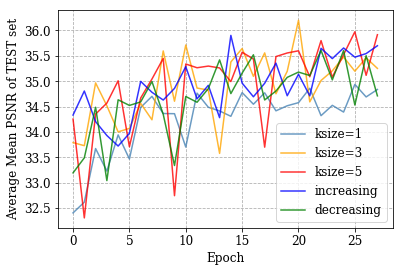

In [88]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rc('font', family='serif', size=12)
step = 1


# iterations = np.arange(1500)
line1 = meanpsnr1[::step]# + meanpsnr1[-1]
line2 = meanpsnr2[::step]# + meanpsnr1[-1]
line3 = meanpsnr3[::step]
line4 = meanpsnr4[::step]
line5 = meanpsnr5[::step]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='S915-A113'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='S915-A313'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='S915-A313'
        )

loss4, = ax.plot(line4,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='blue',
         alpha=0.8,
         label='S915-A313'
        )

loss5, = ax.plot(line5,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='S915-A313'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean PSNR of TEST set')
# plt.xlim([-10,870])
# plt.ylim([0.9,1.0])
ax.grid(linestyle='--')

ax.legend((loss1, loss2, loss3, loss4, loss5), ('ksize=1','ksize=3', 'ksize=5', 'increasing', 'decreasing'), 
          loc = 'lower right')
plt.show()

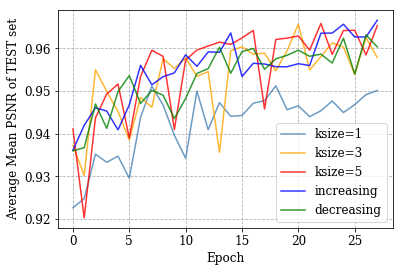

In [91]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rc('font', family='serif', size=12)
step = 1


# iterations = np.arange(1500)
line1 = meanssim1[::step]# + meanpsnr1[-1]
line2 = meanssim2[::step]# + meanpsnr1[-1]
line3 = meanssim3[::step]
line4 = meanssim4[::step]
line5 = meanssim5[::step]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='S915-A113'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='S915-A313'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='S915-A313'
        )

loss4, = ax.plot(line4,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='blue',
         alpha=0.8,
         label='S915-A313'
        )

loss5, = ax.plot(line5,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='S915-A313'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean SSIM of TEST set')
# plt.xlim([-10,870])
# plt.ylim([0.9,1.0])
ax.grid(linestyle='--')

ax.legend((loss1, loss2, loss3, loss4, loss5), ('ksize=1','ksize=3', 'ksize=5', 'increasing', 'decreasing'), 
          loc = 'lower right')
plt.show()

## Compare connections

In [4]:
from scipy.signal import savgol_filter

In [5]:
## READ log file
logfile1 = glob.glob('../log/connection/2018-07-31-11:40:17--logging.log')[0]  # dense
logfile2 = glob.glob('../log/connection/squen.log')[0]                         # sequential
logfile3 = glob.glob('../log/connection/share.log')[0]                         # share

In [6]:
epoch1, iteration1, meanpsnr1, meanssim1, loss1, angularloss1, contentloss1 = get_loginfo(logfile1, state='TRAIN')
epoch2, iteration2, meanpsnr2, meanssim2, loss2, angularloss2, contentloss2 = get_loginfo(logfile2, state='TRAIN')
epoch3, iteration3, meanpsnr3, meanssim3, loss3, angularloss3, contentloss3 = get_loginfo(logfile3, state='TRAIN')

2018-07-31 11:40:17 [INFO]: Train & Test on LFResNet version 201 Sx4Ax2 (with refinenet) dense connection
2018-07-31 11:40:31 [INFO]: Restoring parameters from vgg19/backup/latest
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
len(meanpsnr1)

3878

In [8]:
step = 9
cummeanpsnr1 = [np.sum(meanpsnr1[i:i+step]) for i in range(0,len(meanpsnr1),step)]
cummeanpsnr1 = np.array(cummeanpsnr1[:-1]) / step
cummeanpsnr2 = [np.sum(meanpsnr2[i:i+step]) for i in range(0,len(meanpsnr2),step)]
cummeanpsnr2 = np.array(cummeanpsnr2[:-1]) / step
cummeanpsnr3 = [np.sum(meanpsnr3[i:i+step]) for i in range(0,len(meanpsnr3),step)]
cummeanpsnr3 = np.array(cummeanpsnr3[:-1]) / step

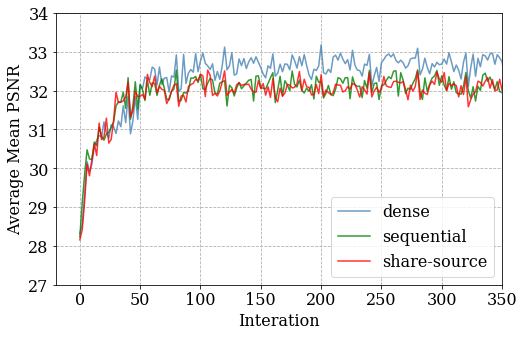

In [11]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc('font', family='serif', size=16)
step = 2

# iterations = np.arange(1500)
# line1 = meanpsnr1[::step]# + meanpsnr1[-1]
# line2 = meanpsnr2[::step]# + meanpsnr1[-1]
# line3 = meanpsnr3[::step]
# line4 = meanpsnr4[::step]
# line5 = meanpsnr5[::step]
line1 = cummeanpsnr1[::step]
line2 = cummeanpsnr2[::step]
line3 = cummeanpsnr3[::step]

# line1 = savgol_filter(line1, 15, 3)
# line2 = savgol_filter(line2, 15, 3)
# line3 = savgol_filter(line3, 15, 3)

fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='dense-connection'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='sequential'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='share-source'
        )
ax.plot()

ax.set_xlabel('Interation')
ax.set_ylabel('Average Mean PSNR')
plt.xlim([-10,175])
plt.ylim([27,34])
ax.grid(linestyle='--')
ax.set_xticklabels(['0','0','50','100','150','200','250','300','350'])   # need to change

ax.legend((loss1, loss2, loss3), ('dense', 'sequential', 'share-source'), loc = 'lower right')
# plt.savefig('compare_connection.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [26]:
epoch1, iteration1, meanpsnr1, meanssim1, loss1, angularloss1, contentloss1 = get_loginfo(logfile1, state='TEST')
epoch2, iteration2, meanpsnr2, meanssim2, loss2, angularloss2, contentloss2 = get_loginfo(logfile2, state='TEST')
epoch3, iteration3, meanpsnr3, meanssim3, loss3, angularloss3, contentloss3 = get_loginfo(logfile3, state='TEST')

2018-07-31 11:40:17 [INFO]: Train & Test on LFResNet version 201 Sx4Ax2 (with refinenet) dense connection
2018-07-31 11:40:31 [INFO]: Restoring parameters from vgg19/backup/latest
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
meanpsnr1 = meanpsnr1
meanpsnr2 = meanpsnr2
meanpsnr3 = meanpsnr3
print len(meanpsnr1)
print len(meanpsnr2)
print len(meanpsnr3)

17
13
13


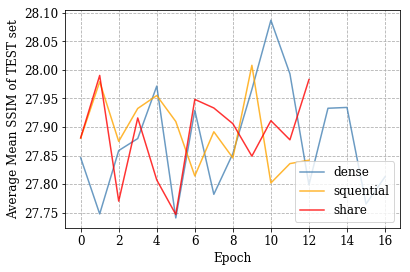

In [28]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rc('font', family='serif', size=12)
step = 1


# iterations = np.arange(1500)
line1 = meanpsnr1[::step]# + meanpsnr1[-1]
line2 = meanpsnr2[::step]# + meanpsnr1[-1]
line3 = meanpsnr3[::step]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='dense'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='squential'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='share'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean SSIM of TEST set')
# plt.xlim([-10,870])
# plt.ylim([0.9,1.0])
ax.grid(linestyle='--')

ax.legend((loss1, loss2, loss3), ('dense','squential', 'share'), 
          loc = 'lower right')
plt.show()